In [251]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import os

In [233]:
df_20_test = pd.read_csv('data/test/data_20.csv')
df_21_test = pd.read_csv('data/test/data_21.csv')
df_22_test = pd.read_csv('data/test/data_22.csv')
df_23_test = pd.read_csv('data/test/data_23.csv')
df_24_test = pd.read_csv('data/test/data_24.csv')
total_test = pd.concat([df_20_test,df_21_test,df_22_test,df_23_test, df_24_test])

In [242]:
training_files = []
for dirname, _, filenames in os.walk('data/train/'):
    for filename in filenames:
        df_path = os.path.join(dirname, filename)
        if 'train' in df_path:
            # print(df_path)
            training_files.append(pd.read_csv(df_path))
            
            
total_train = pd.concat(training_files)
total_train

x          y          z  010-000-024-033  010-000-030-096  \
0     18.495860  13.766527  14.362624              0.0              0.0   
1     18.501072  13.827225  14.270268              0.0              0.0   
2     18.405950  13.868976  14.094804              1.0              0.0   
3     18.444572  13.910701  14.116078              0.0              1.0   
4     18.418470  13.933917  14.320566              0.0              0.0   
...         ...        ...        ...              ...              ...   
5800  13.071400  13.964593  14.014944              0.0              0.0   
5801  13.170663  14.089759  13.972008              0.0              0.0   
5802  13.262426  14.129938  13.811263              1.0              0.0   
5803  13.282711  14.161534  13.781787              0.0              1.0   
5804  13.356316  14.236007  13.767518              0.0              0.0   

      020-000-032-221  020-000-033-111  anomaly  
0                 0.0              1.0      0.0  
1                 1.0              0.0      0.0  
2                 0.0              0.0      0.0  
3                 0.0              0.0      0.0  
4                 0.0              1.0      0.0  
...               ...              ...      ...  
5800              0.0              1.0      0.0  
5801              1.0              0.0      0.0  
5802              0.0              0.0      0.0  
5803              0.0              0.0      0.0  
5804              0.0              1.0      0.0  

[140034 rows x 8 columns]

**Описание данных**

* X , Y и Z представляют положения датчика на каждом образце. Временные метки каждого измерения были удалены, поскольку временные метки как признак, как правило, являются основными компонентами задач классификации. Проблемой использования временных меток является несбалансированная обучающая задача без возможности широкого обобщения.

* 010-000-024-033 , 010-000-030-096 , 020-000-032-221 и 020-000-033-111 представляют собой однократно закодированные представления каждой активности сенсора. В ходе экспериментов использовались четыре датчика, которые закреплялись на груди, лодыжках и поясе человека.

* Метки представляют падение/событие нормальной жизни, где 0 — нормальное явление, а 1 — аномальное событие падения.

* Каждый файл .csv представляет собой отдельного человека, за которым наблюдали в ходе экспериментов. Дано 5 испытуемых и 20 обучающих.

In [63]:
def graph_draw(file):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1, 2, 1,projection='3d')
    # где 0 — нормальное явление, а 1 — аномальное событие падения.
    colors = ['black', 'red']

    c_list = []
    for val in file['anomaly']:
        if val == 0: 
            c_list.append(colors[0])
        else:
            c_list.append(colors[1])

    ax1.scatter(file['x'], file['y'], zs=file['z'], linewidths=.1, c=c_list)
    ax1.view_init(elev=20., azim=-130)
    plt.show()

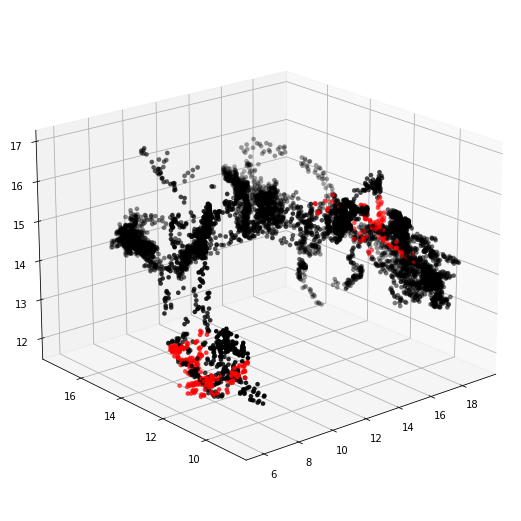

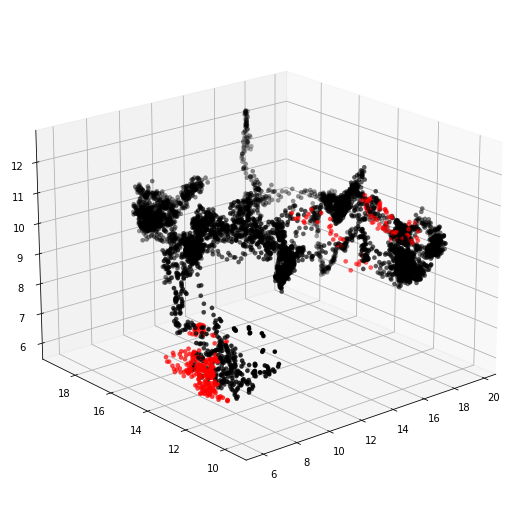

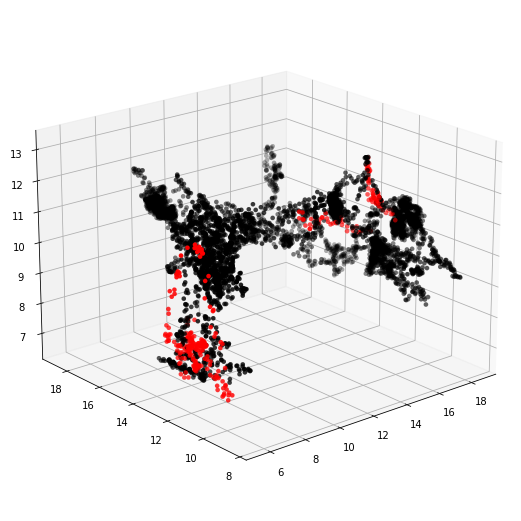

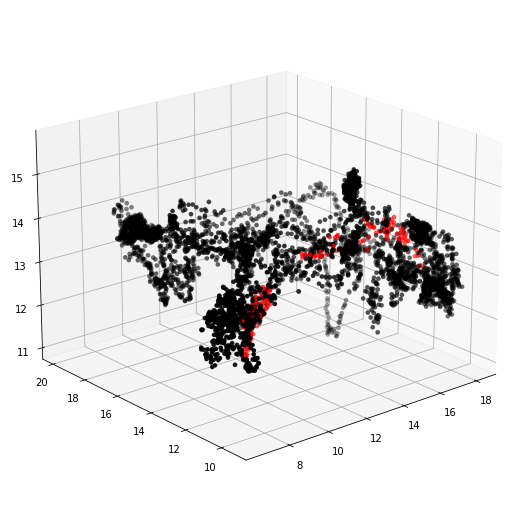

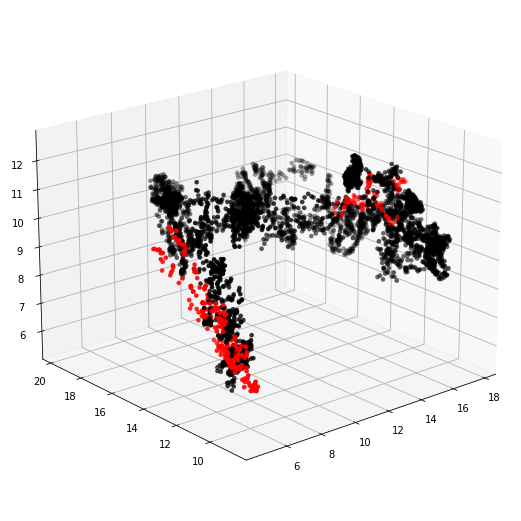

In [67]:
# fig = plt.figure(figsize=(20,10))
# ax1 = fig.add_subplot(1, 2, 1,projection='3d')
# # где 0 — нормальное явление, а 1 — аномальное событие падения.
# colors = ['black', 'red']

# c_list = []
# for val in df_20_test['anomaly']:
#     if val == 0: 
#         c_list.append(colors[0])
#     else:
#         c_list.append(colors[1])

# ax1.scatter(df_20_test['x'], df_20_test['y'], zs=df_20_test['z'], linewidths=.1, c=c_list)
# ax1.view_init(elev=20., azim=-130)


arr = [df_20_test, df_21_test, df_22_test, df_23_test, df_24_test]
for i in arr:
    graph_draw(i)


In [91]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}],
           [{'type': 'surface'}, {'type': 'surface'}]]
)

# adding surfaces to subplots. df_20_test['x'], df_20_test['y'], zs=df_20_test['z']
fig.add_trace(
    go.Scatter3d(x=df_20_test['x'], 
                 y=df_20_test['y'], 
                 z=df_20_test['z'],
                 mode='markers',
                 marker=dict(
                            size=1,
                            color=df_20_test['anomaly'], # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )),
    row=1, col=1)

fig.add_trace(
    go.Scatter3d(x=df_21_test['x'], 
                 y=df_21_test['y'], 
                 z=df_21_test['z'],  
                 mode='markers',
                 marker=dict(
                            size=1,
                            color=df_21_test['anomaly'], # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )),
    row=1, col=2)

fig.add_trace(
    go.Scatter3d(x=df_22_test['x'], 
                 y=df_22_test['y'], 
                 z=df_22_test['z'], 
                 mode='markers',
                 marker=dict(
                            size=1,
                            color=df_22_test['anomaly'], # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )),
    row=2, col=1)

fig.add_trace(
    go.Scatter3d(x=df_23_test['x'], 
                 y=df_23_test['y'], 
                 z=df_23_test['z'],  
                 mode='markers',    
                 marker=dict(
                            size=1,
                            color=df_23_test['anomaly'], # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )),
    row=2, col=2)

fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()

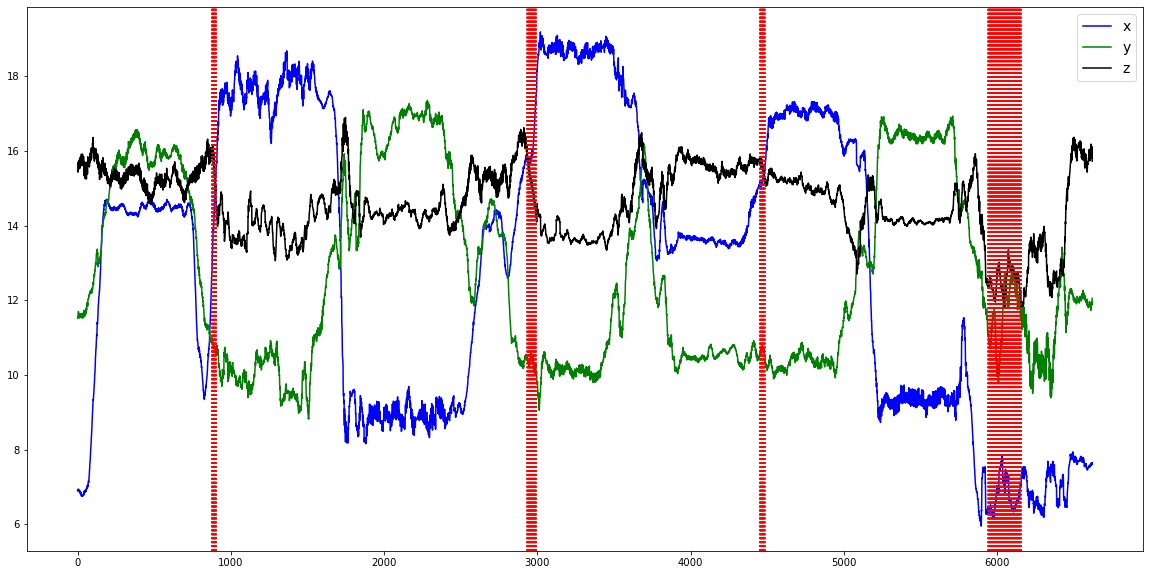

In [148]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_20_test['x'], color='blue',label='x')
ax.plot(df_20_test['y'], color='green',label='y')
ax.plot(df_20_test['z'], color='black',label='z')

for i in df_20_test[df_20_test['anomaly']==1]['x'].index:
    line = ax.axvline(x=i, color="red", linestyle=":" )

plt.legend(fontsize=14)
plt.show()

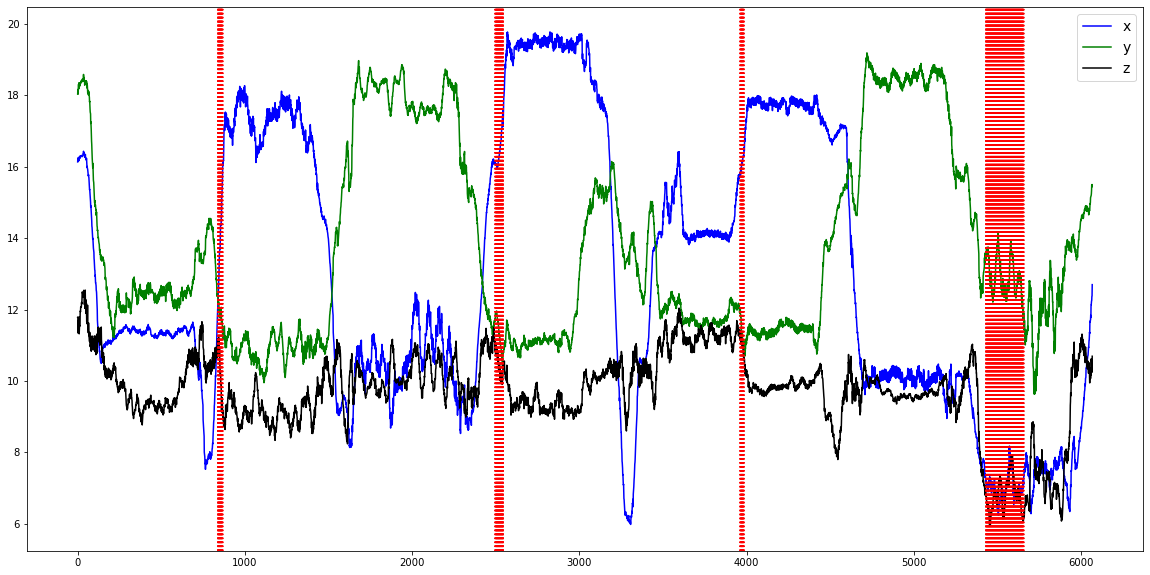

In [156]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_21_test['x'], color='blue',label='x')
ax.plot(df_21_test['y'], color='green',label='y')
ax.plot(df_21_test['z'], color='black',label='z')

for i in df_21_test[df_21_test['anomaly']==1]['x'].index:
    line = ax.axvline(x=i, color="red", linestyle=":" )

plt.legend(fontsize=14)
plt.show()

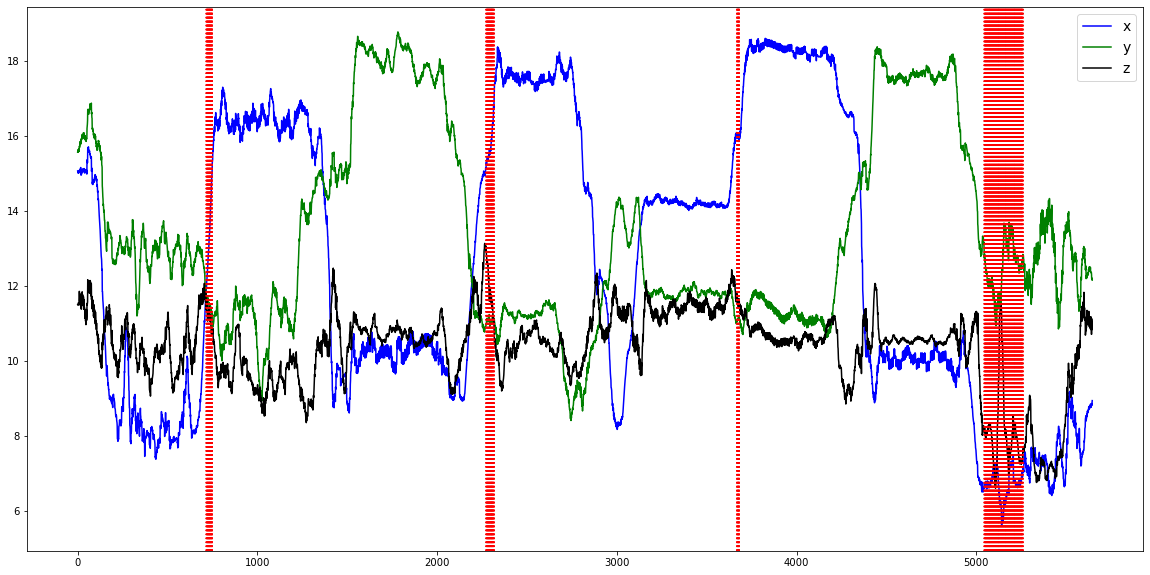

In [157]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_22_test['x'], color='blue',label='x')
ax.plot(df_22_test['y'], color='green',label='y')
ax.plot(df_22_test['z'], color='black',label='z')

for i in df_22_test[df_22_test['anomaly']==1]['x'].index:
    line = ax.axvline(x=i, color="red", linestyle=":" )

plt.legend(fontsize=14)
plt.show()

**Logistic Regression**

In [244]:
def log_regr_plus_estimate_new(df_tr, df_test):
    X_test = df_test.drop('anomaly', axis=1)
    y_test = df_test['anomaly']
    X_train = df_tr.drop('anomaly', axis=1)
    y_train = df_tr['anomaly']
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

In [245]:
def log_regr_plus_estimate_scaled_new(df_tr, df_test):
    X_test = df_test.drop('anomaly', axis=1)
    y_test = df_test['anomaly']
    X_train = df_tr.drop('anomaly', axis=1)
    y_train = df_tr['anomaly']
    
    scale = StandardScaler()
    scaledX_test = scale.fit_transform(X_test)
    scaledX_train = scale.fit_transform(X_train)
  
    clf = LogisticRegression(random_state=0).fit(scaledX_train, y_train)
    y_pred = clf.predict(scaledX_test)
    
    print(classification_report(y_test, y_pred))

In [247]:
log_regr_plus_estimate_new(total_train, total_test)
log_regr_plus_estimate_scaled_new(total_train, total_test)

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     28420
         1.0       0.00      0.00      0.00      1610

    accuracy                           0.95     30030
   macro avg       0.47      0.50      0.49     30030
weighted avg       0.90      0.95      0.92     30030

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     28420
         1.0       0.00      0.00      0.00      1610

    accuracy                           0.95     30030
   macro avg       0.47      0.50      0.49     30030
weighted avg       0.90      0.95      0.92     30030



C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Very bad results with "recall" metric that is why this method is not acceptable for this datasets

Let's try another method - Random Forest

**Random Forest**

In [248]:
def random_forest_plus_estimate_new(df_tr, df_test):
    X_test = df_test.drop('anomaly', axis=1)
    y_test = df_test['anomaly']
    X_train = df_tr.drop('anomaly', axis=1)
    y_train = df_tr['anomaly']
    
    randfor = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    y_pred = randfor.predict(X_test)
    
    print(classification_report(y_test, y_pred))

In [249]:
def random_forest_plus_estimate_scaled_new(df_tr, df_test):
    X_test = df_test.drop('anomaly', axis=1)
    y_test = df_test['anomaly']
    X_train = df_tr.drop('anomaly', axis=1)
    y_train = df_tr['anomaly']
    
    scale = StandardScaler()
    scaledX_test = scale.fit_transform(X_test)
    scaledX_train = scale.fit_transform(X_train)
    
    randfor = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    y_pred = randfor.predict(X_test)
    
    print(classification_report(y_test, y_pred))

In [253]:
random_forest_plus_estimate_new(total_train, total_test)
# random_forest_plus_estimate_scaled_new(total_train, total_test)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     28420
         1.0       0.24      0.05      0.08      1610

    accuracy                           0.94     30030
   macro avg       0.59      0.52      0.53     30030
weighted avg       0.91      0.94      0.92     30030



In [235]:
# def log_regr_plus_estimate_old(name, df):
#     X = df.drop('anomaly', axis=1)
#     y = df['anomaly']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
    
#     print(name)
#     print(classification_report(y_test, y_pred))

In [236]:
# def log_regr_plus_estimate_scaled_old(name, df):
#     X = df.drop('anomaly', axis=1)
#     scale = StandardScaler()
#     scaledX = scale.fit_transform(X)
#     y = df['anomaly']
#     X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)
    
#     clf = LogisticRegression(random_state=0).fit(scaledX, y_train)
#     y_pred = clf.predict(X_test)
    
#     print(name,'_scaled')
#     print(classification_report(y_test, y_pred))

In [255]:
# dataframes = [df_20_test, df_21_test, df_22_test, df_23_test, df_24_test]
# dict_df = {"df_20_test.csv": df_20_test, "df_21_test.csv": df_21_test,"df_22_test.csv": df_22_test,"df_23_test.csv": df_23_test,"df_24_test.csv": df_24_test}

# for name, dataframe in dict_df.items():
#     log_regr_plus_estimate_old(name, dataframe)
#     log_regr_plus_estimate_scaled_old(name, dataframe)

In [209]:
# def random_forest_plus_estimate(name, df):
#     X = df.drop('anomaly', axis=1)
#     y = df['anomaly']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     randfor = RandomForestClassifier(random_state=0).fit(X_train, y_train)
#     y_pred = randfor.predict(X_test)
    
#     print(name)
#     print(classification_report(y_test, y_pred))

In [211]:
# def random_forest_plus_estimate_scaled(name, df):
#     X = df.drop('anomaly', axis=1)
#     scale = StandardScaler()
#     scaledX = scale.fit_transform(X)
#     y = df['anomaly']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     randfor = RandomForestClassifier(random_state=0).fit(X_train, y_train)
#     y_pred = randfor.predict(X_test)
    
#     print(name,'_scaled')
#     print(classification_report(y_test, y_pred))

In [254]:
# for name, dataframe in dict_df.items():
#     random_forest_plus_estimate(name, dataframe)
#     random_forest_plus_estimate_scaled(name, dataframe)